Confusion matrix, without normalization


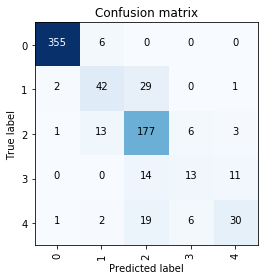

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       361
           1       0.67      0.57      0.61        74
           2       0.74      0.89      0.81       200
           3       0.52      0.34      0.41        38
           4       0.67      0.52      0.58        58

    accuracy                           0.84       731
   macro avg       0.72      0.66      0.68       731
weighted avg       0.84      0.84      0.84       731



In [28]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import imageio
import numpy as np

import itertools

import code
import csv
import pandas as pd



def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix very prettily.
    Normalization can be applied by setting `normalize=True`.
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)

    # Specify the tick marks and axis text
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    # The data formatting
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    # Print the text of the matrix, adjusting text colour for display
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()


fold_num = 3
#model = 'vgg19'
#model = 'resnet50'
model = 'resnet152'
#model = 'alexnet'
#model = 'vgg16'

with open('CAM_{}_fold{}.csv'.format(model, fold_num), newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

classes = [0,1,2,3,4]

labels_list = []
predicted_list = []
for line in data[1:]:
    labels, predicted = line[1], line[2]
    labels_list.append(labels)
    predicted_list.append(predicted)
#code.interact(local=dict(globals(), **locals()))
cm = confusion_matrix(labels_list, predicted_list)
cm_plot = plot_confusion_matrix(cm, classes)


print(classification_report(labels_list, predicted_list))